In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
# Load data
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

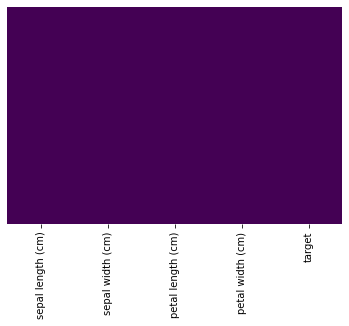

In [3]:
#vérifier s'il y a des valeurs manquantes , ici il n'y en a pas visuellement
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [4]:
train = pd.read_csv('titanic_train.csv')
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'titanic_train.csv'

In [5]:
model_dic = {0: 'NearestNeighbor', 1: 'DecisionTree', 2:'RandomForest', 3:'SVM'}

In [11]:
import yaml
import json
from igel import Igel

result={} 

with open('iris.yaml') as fp: 
    data = yaml.load(fp)
    for model in model_dic:
        data['model']['algorithm'] = model_dic[model]
        with open('iris.yaml','w') as fp:
            yaml.dump(data, fp)
            
            mock_fit_params = {'data_path': './examples/data/iris/train-Iris.csv',
                   'yaml_path': './iris.yaml',
                   'cmd': 'fit'}
            Igel(**mock_fit_params)
            
            mock_eval_params = {'data_path': './examples/data/iris/train-Iris.csv',
                    'cmd': 'evaluate'}
            json_data=Igel(**mock_eval_params)
            
            json_data_read= json.loads(json_data.evaluation_file.read_text())
            result[model_dic[model]]=json_data_read['f1_score']    

INFO - Entered CLI args: {'data_path': './examples/data/iris/train-Iris.csv', 'yaml_path': './iris.yaml', 'cmd': 'fit'}
INFO - Executing command: fit ...
INFO - reading data from ./examples/data/iris/train-Iris.csv
INFO - You passed the configurations as a yaml file.
INFO - your chosen configuration: {'dataset': {'preprocess': {'encoding': {'column': 'Species', 'type': 'labelEncoding'}, 'missing_values': 'mean', 'scale': {'method': 'standard', 'target': 'inputs'}}, 'split': {'shuffle': True, 'stratify': 'default', 'test_size': 0.2}}, 'model': {'algorithm': 'NearestNeighbor', 'type': 'classification'}, 'target': ['Species']}
INFO - dataset_props: {'preprocess': {'encoding': {'column': 'Species', 'type': 'labelEncoding'}, 'missing_values': 'mean', 'scale': {'method': 'standard', 'target': 'inputs'}}, 'split': {'shuffle': True, 'stratify': 'default', 'test_size': 0.2}} 
model_props: {'algorithm': 'NearestNeighbor', 'type': 'classification'} 
 target: ['Species'] 

INFO - dataset shape: (1

INFO - split option detected. The performance will be automatically evaluated using the test data portion
INFO - Calculating accuracy_score .....
INFO - type of target: multiclass
INFO - Calculating f1_score .....
INFO - type of target: multiclass
INFO - Calculating precision_score .....
INFO - type of target: multiclass
INFO - Calculating recall_score .....
INFO - type of target: multiclass
INFO - saving fit description to /Users/k_im/Documents/Formation/Formation IA/Academie IBM/driss/IGEL projet/igel-master/model_results/description.json
INFO - Entered CLI args: {'data_path': './examples/data/iris/train-Iris.csv', 'cmd': 'evaluate'}
INFO - Executing command: evaluate ...
INFO - reading data from ./examples/data/iris/train-Iris.csv
INFO - path of the pre-fitted model => /Users/k_im/Documents/Formation/Formation IA/Academie IBM/driss/IGEL projet/igel-master/model_results/model.sav
INFO - result path: /Users/k_im/Documents/Formation/Formation IA/Academie IBM/driss/IGEL projet/igel-mast

INFO - dataset_props: {'preprocess': {'encoding': {'column': 'Species', 'type': 'labelEncoding'}, 'missing_values': 'mean', 'scale': {'method': 'standard', 'target': 'inputs'}}, 'split': {'shuffle': True, 'stratify': 'default', 'test_size': 0.2}} 
model_props: {'algorithm': 'SVM', 'type': 'classification'} 
 target: ['Species'] 

INFO - dataset shape: (150, 5)
INFO - dataset attributes: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
INFO - performing a label encoding ...
INFO - label encoding classes => ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
INFO - classes map => {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
INFO - adding classes_map to dataset props: 
{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
INFO - shape of the dataset after encoding => (150, 5)
INFO - Check for missing values in the dataset ...  
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64  


In [12]:
best_score = 0
best_classifier = ''
for _, val in enumerate(result):
    print('%s test f1_score: %.5f' % (val,result[val]))
    if result[val] > best_score:
        best_score = result[val]
        best_classifier = val
print('\n %s Classifier has the best f1_score : %.2f' %(best_classifier,best_score))

NearestNeighbor test f1_score: 0.95333
DecisionTree test f1_score: 0.98667
RandomForest test f1_score: 0.98667
SVM test f1_score: 0.96667

 DecisionTree Classifier has the best f1_score : 0.99
